In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

#Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

#Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #r2_score should be near to 1

%matplotlib inline

In [2]:
#Reading the data

df = pd.read_csv(r'E:\Portfolio\Flight Prediction Ineuron\Dataset\Clean_Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [18]:
#Dropping the unwanted columns

df.drop(['flight'], axis = 1, inplace = True)

In [7]:
df.shape

(300153, 11)

In [8]:
df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [18]:
categorical_columns = list(df.loc[:,df.dtypes == 'object'].columns)

In [21]:
numerical_columns = list(df.columns)
for i in categorical_columns:
    if i in numerical_columns:
        numerical_columns.remove(i)

In [22]:
numerical_columns

['duration', 'days_left', 'price']

In [7]:
#Checking for Missing Values
missing_val = df.isnull().sum()
missing_val = pd.DataFrame(missing_val, index=None, columns=['Features'])
print("*"*120)
print("No of features with missing values {}".format(len(missing_val.iloc[np.where(missing_val['Features'] > 0)])))
print("*"*120)

************************************************************************************************************************
No of features with missing values 0
************************************************************************************************************************


In [8]:
#Checking for Duplicate columns
print("*"*120)
print("Number of Duplicate rows in our dataset : {}".format(df.duplicated().sum()))
print("*"*120)

************************************************************************************************************************
Number of Duplicate rows in our dataset : 2213
************************************************************************************************************************


In [10]:
#Dropping the duplicate rows in the dataset

df.drop_duplicates(keep = 'first', inplace = True, ignore_index = True)

df.shape

(297940, 10)

In [12]:
groupby_class_airline = df.groupby(['airline','class'], axis = 0, as_index = False).agg({'duration':'count','price':'mean'}).sort_values(['class','airline'], ascending = True)

print("*"*120)
print("Observation: Only 2 airlines offer Business class")
print("*"*120)
groupby_class_airline

************************************************************************************************************************
Observation: Only 2 airlines offer Business class
************************************************************************************************************************


,airline,class,duration,price
1,Air_India,Business,32895,47131.751482
6,Vistara,Business,60278,55570.775358
0,AirAsia,Economy,16011,4099.466554
2,Air_India,Economy,47987,7313.784025
3,GO_FIRST,Economy,22979,5668.456678
4,Indigo,Economy,42470,5348.720367
5,SpiceJet,Economy,8636,6210.620542
7,Vistara,Economy,66684,7827.594071


In [14]:
groupby_stops = df.groupby(['stops','class'], axis = 0, as_index = False).agg({'duration':'count','price':'mean'}).sort_values(['class','stops'], ascending = True)

print("*"*120)
print("Observation: Majority tickets are booked with 1 stop and very few tickets with 2 or more stops")
print("Observation: Price increases with increase in stops")
print("*"*120)
groupby_stops

************************************************************************************************************************
Observation: Majority tickets are booked with 1 stop and very few tickets with 2 or more stops
Observation: Price increases with increase in stops
************************************************************************************************************************


,stops,class,duration,price
0,one,Business,84249,54683.309820
2,two_or_more,Business,1083,70127.660203
4,zero,Business,7841,27691.842495
1,one,Economy,166065,6816.317707
3,two_or_more,Economy,12202,9142.047697
5,zero,Economy,26500,4004.749774


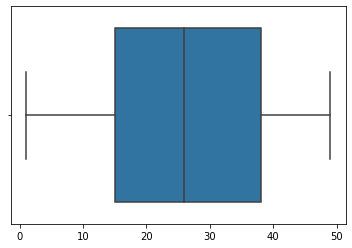

In [19]:
sns.boxplot(df[['days_left']])

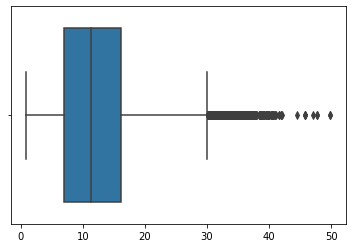

In [21]:
sns.boxplot(df[['duration']])

D:\Anaconda_Install\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


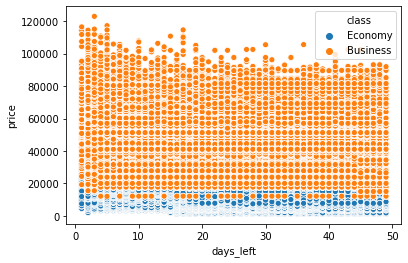

In [24]:
sns.scatterplot(x = 'days_left', y = 'price', data = df, hue = 'class')

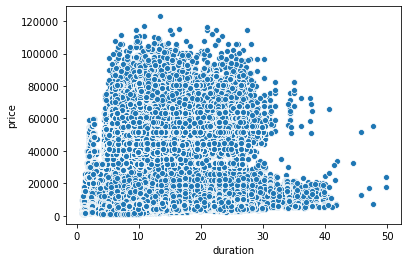

In [25]:
sns.scatterplot(x = 'duration', y = 'price', data = df)

In [23]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [28]:
cor = round(df.corr(), 2)

In [30]:
cor

,duration,days_left,price
duration,1.00,-0.04,0.20
days_left,-0.04,1.00,-0.09
price,0.20,-0.09,1.00


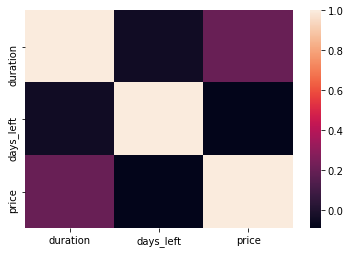

In [29]:
sns.heatmap(data = cor)

In [5]:
print(len(df['airline'].unique()))
df['airline'].unique()

6


array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [7]:
df.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956


In [32]:
print(len(df['source_city'].unique()))
df['source_city'].unique()

6


array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [33]:
print(len(df['departure_time'].unique()))
df['departure_time'].unique()

6


array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [34]:
print(len(df['stops'].unique()))
df['stops'].unique()

3


array(['zero', 'one', 'two_or_more'], dtype=object)

In [35]:
print(len(df['arrival_time'].unique()))
df['arrival_time'].unique()

6


array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [36]:
print(len(df['destination_city'].unique()))
df['destination_city'].unique()

6


array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [37]:
print(len(df['class'].unique()))
df['class'].unique()  

2


array(['Economy', 'Business'], dtype=object)

In [38]:
df.dtypes

airline              object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [11]:
df_encoded = pd.get_dummies(df[['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']], drop_first = True)

In [13]:
df_encoded.head(3)

,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,True
1,False,False,False,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,True
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [16]:
df.drop(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class'], axis = 1, inplace = True)

In [19]:
df.columns

Index(['duration', 'days_left', 'price'], dtype='object')

In [20]:
df_final = pd.concat([df_encoded, df], axis = 1)

In [21]:
df_final.columns

Index(['airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'source_city_Chennai',
       'source_city_Delhi', 'source_city_Hyderabad', 'source_city_Kolkata',
       'source_city_Mumbai', 'departure_time_Early_Morning',
       'departure_time_Evening', 'departure_time_Late_Night',
       'departure_time_Morning', 'departure_time_Night', 'stops_two_or_more',
       'stops_zero', 'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai', 'class_Economy', 'duration', 'days_left',
       'price'],
      dtype='object')

In [22]:
df_final.head()

,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,...,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy,duration,days_left,price
0,False,False,False,True,False,False,True,False,False,False,...,True,False,False,False,False,True,True,2.17,1,5953
1,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,True,True,2.33,1,5953
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,True,2.17,1,5956
3,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,True,True,2.25,1,5955
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,True,True,2.33,1,5955


In [24]:
#Splitting Independent and Dependent Variables different
df_dep = df_final[['price']]
df_final.drop(['price'], axis = 1, inplace = True)

In [ ]:
MinMax = 0 - 1 
STANDARDIZATION = Mean => 0
STD DEV = 1

df

In [30]:
#Splitting the data into training and testing set
X_train, y_train, X_test, y_test = train_test_split(df_final, df_dep, train_size = 0.80, random_state = 101)

In [31]:
print(X_train.shape) -- Training Dependent Columns
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240122, 30)
(240122, 1)
(60031, 30)
(60031, 1)


In [36]:
X_train.head()

,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,...,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy,duration,days_left
156879,False,False,True,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,5.25,37
20513,False,True,False,False,False,False,True,False,False,False,...,False,True,False,False,False,True,False,True,8.58,4
27520,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,True,6.58,42
240223,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,15.67,32
214726,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,5.58,35


In [27]:
df_final.shape

(300153, 30)

In [32]:
#Applying Normalization 
scaler = MinMaxScaler()
X_scaled_train = scaler.fit_transform(X_train)

In [69]:
y_train.head()

,price
92553,3467
249577,67004
275411,53835
268617,52175
176817,1788


In [76]:
y_scaled_train = scaler.transform(y_train)

# Random Forest Model

In [79]:
rf = RandomForestRegressor(n_estimators = 250, criterion = 'absolute_error', n_jobs = -1)

In [ ]:
rf_model = rf.fit(X_train, X_test)

<ipython-input-81-a9ca4be9fed1>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = rf.fit(X_train, X_test)


In [ ]:
y_pred_rf = rf_model.predict(y_train)

In [ ]:
#Evaluation
print("MAE for Random Forest : {}".format(mean_absolute_error(y_test,y_pred_rf)))
print("MSE for Random Forest : {}".format(mean_squared_error(y_test,y_pred_rf)))
print("RMSE for Random Forest : {}".format(np.sqrt(mean_squared_error(y_test,y_pred_rf))))
print("RMSE for Random Forest : {}".format(r2_score(y_test,y_pred_rf)))

# Support Vector Regressor

In [ ]:
svr = SVR(C=1.0, epsilon=0.2)

In [ ]:
svr_model = svr.fit(X_train, X_test)

In [ ]:
y_pred_svr = svr_model.predict(y_train)

In [ ]:
#Evaluation
print("MAE for Random Forest : {}".format(mean_absolute_error(y_test,y_pred_svr)))
print("MSE for Random Forest : {}".format(mean_squared_error(y_test,y_pred_svr)))
print("RMSE for Random Forest : {}".format(np.sqrt(mean_squared_error(y_test,y_pred_svr))))
print("RMSE for Random Forest : {}".format(r2_score(y_test,y_pred_svr)))

# XG Boost

In [ ]:
xgb_r = xgb.XGBRegressor(objective ='reg:linear', n_estimators = 100, seed = 123)

In [ ]:
xgb_model = xgb_r.fit(X_train, X_test)

In [ ]:
y_pred_xgb = svr_model.predict(y_train)

In [ ]:
#Evaluation
print("MAE for Random Forest : {}".format(mean_absolute_error(y_test,y_pred_xgb)))
print("MSE for Random Forest : {}".format(mean_squared_error(y_test,y_pred_xgb)))
print("RMSE for Random Forest : {}".format(np.sqrt(mean_squared_error(y_test,y_pred_xgb))))
print("RMSE for Random Forest : {}".format(r2_score(y_test,y_pred_xgb)))